THIS FILE CONTAINS EXPLORATORY DATA ANALYSIS VISUALIZATION AND FEW MACHINE LERANING MODEL TRAINING AND ITS ACCURACY AND ROC SCORE

THE DATA PROCESSED HERE IS USED IN A SIMPLE ANN TO GET THE BEST OUTPUT

EMPLOYEE PROMOTION PREDICTION

As we have train and test data separated already we are not using train test split

importing numpy,pandas,matplotlib and seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.metrics import roc_auc_score

importing datasets

In [4]:
x=pd.read_csv('/home/aravint/complete ml/train_data.csv')

In [5]:
x.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,190767,Operations,region_27,Bachelor's,m,sourcing,1,47,1.0,6,1,0,55,0
1,10520,Sales & Marketing,region_31,Bachelor's,m,other,1,38,3.0,9,0,0,54,0
2,103549,Technology,region_27,Master's & above,m,sourcing,1,37,3.0,3,1,0,76,0
3,108438,Sales & Marketing,region_10,Bachelor's,m,sourcing,1,30,4.0,4,0,0,41,0
4,51805,Procurement,region_22,Bachelor's,m,sourcing,1,35,3.0,10,0,0,68,0


In [6]:
x.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,155846.000000,155846.000000,155846.000000,142491.000000,155846.000000,155846.000000,155846.000000,155846.000000,155846.000000
mean,97459.440563,1.309498,34.627016,3.290032,5.884033,0.408782,0.025127,63.609506,0.145143
std,56252.560738,0.545987,7.666873,1.207803,4.060386,0.491610,0.156512,13.483408,0.352246
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,48739.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,52.000000,0.000000
50%,97491.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,61.000000,0.000000
75%,146190.750000,2.000000,39.000000,4.000000,8.000000,1.000000,0.000000,74.000000,0.000000
max,194808.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
print(len(x))

155846


total 155846 rows

In [8]:
x.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [9]:
print(x)

        employee_id         department     region         education gender  \
0            190767         Operations  region_27        Bachelor's      m   
1             10520  Sales & Marketing  region_31        Bachelor's      m   
2            103549         Technology  region_27  Master's & above      m   
3            108438  Sales & Marketing  region_10        Bachelor's      m   
4             51805        Procurement  region_22        Bachelor's      m   
...             ...                ...        ...               ...    ...   
155841        28027         Technology  region_24        Bachelor's      f   
155842       135763         Technology   region_5        Bachelor's      m   
155843        91998         Technology   region_5        Bachelor's      m   
155844        35632         Operations  region_30        Bachelor's      f   
155845       139474                 HR  region_22        Bachelor's      m   

       recruitment_channel  no_of_trainings  age  previous_year

as employee id is of no use we drop it

In [10]:
x=x.drop(['employee_id'],axis=1)

In [11]:
x.shape

(155846, 13)

In [12]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Operations,region_27,Bachelor's,m,sourcing,1,47,1.0,6,1,0,55,0
1,Sales & Marketing,region_31,Bachelor's,m,other,1,38,3.0,9,0,0,54,0
2,Technology,region_27,Master's & above,m,sourcing,1,37,3.0,3,1,0,76,0
3,Sales & Marketing,region_10,Bachelor's,m,sourcing,1,30,4.0,4,0,0,41,0
4,Procurement,region_22,Bachelor's,m,sourcing,1,35,3.0,10,0,0,68,0


finding no of unique values in dept

In [13]:
unique_values_count = x['department'].nunique()
print(unique_values_count)


9


no of unique region

In [14]:
unique_values_count = x['region'].nunique()
print(unique_values_count)


34


no of unique education

In [15]:
unique_values_count = x['education'].nunique()
print(unique_values_count)

3


no of unique recruitment channel

In [16]:
unique_values_count = x['recruitment_channel'].nunique()
print(unique_values_count)

3


<Axes: xlabel='department', ylabel='count'>

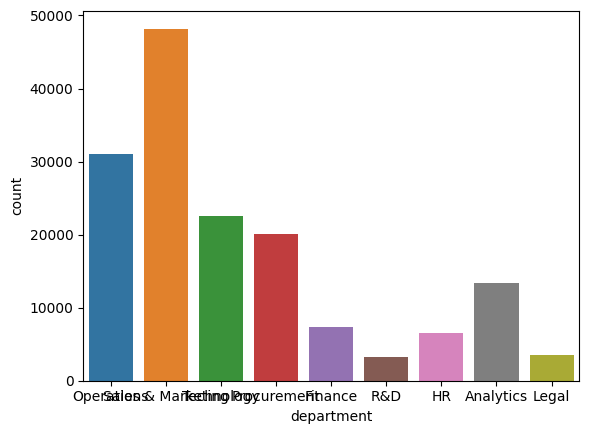

In [17]:
sns.countplot(x='department',data=x)

<Axes: xlabel='education', ylabel='count'>

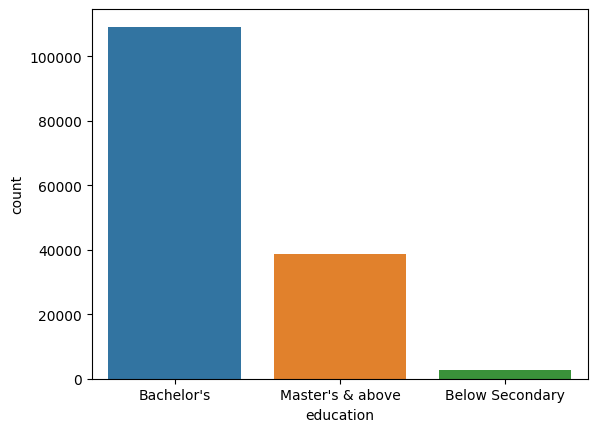

In [18]:
sns.countplot(x='education',data=x)

<Axes: xlabel='recruitment_channel', ylabel='count'>

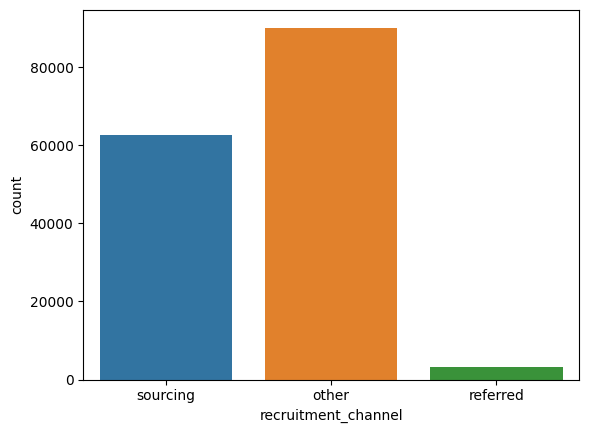

In [19]:
sns.countplot(x='recruitment_channel',data=x)

<Axes: xlabel='region', ylabel='count'>

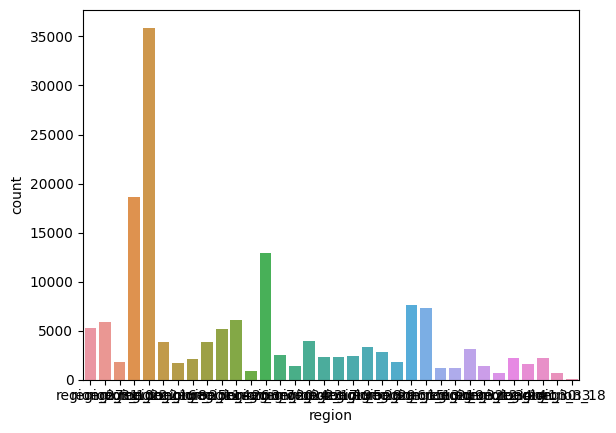

In [20]:
sns.countplot(x='region',data=x)

finding missing values

In [21]:
x.isnull().sum()

department                  0
region                      0
education                5330
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating    13355
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted                 0
dtype: int64

lets drop all missing education and give 0 for all missing previous year rating

In [22]:
x['previous_year_rating'] = x['previous_year_rating'].fillna(0)

In [23]:
x.isnull().sum()

department                 0
region                     0
education               5330
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [24]:
selected_rows = x[x['previous_year_rating'] == 0]

print(selected_rows)

               department     region         education gender  \
9       Sales & Marketing   region_2        Bachelor's      m   
14             Operations  region_11        Bachelor's      m   
23      Sales & Marketing   region_2        Bachelor's      m   
50             Operations  region_20        Bachelor's      f   
59             Operations   region_6        Bachelor's      m   
...                   ...        ...               ...    ...   
155751  Sales & Marketing  region_22        Bachelor's      m   
155767        Procurement   region_5        Bachelor's      f   
155772        Procurement  region_16        Bachelor's      m   
155780        Procurement  region_30        Bachelor's      m   
155782         Technology   region_6  Master's & above      f   

       recruitment_channel  no_of_trainings  age  previous_year_rating  \
9                    other                1   38                   0.0   
14                   other                1   30                   0.0 

In [25]:
selected = x.loc[x['previous_year_rating'] == 0, 'is_promoted']

print(selected)

9         0
14        0
23        0
50        0
59        0
         ..
155751    0
155767    0
155772    1
155780    1
155782    0
Name: is_promoted, Length: 13355, dtype: int64


In [26]:
count=0
for row in selected:
    if row ==1:
        count+=1
print(count)        

2347


2347 employee null values of previous year rating is promoted

In [27]:
x.shape

(155846, 13)

In [28]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Operations,region_27,Bachelor's,m,sourcing,1,47,1.0,6,1,0,55,0
1,Sales & Marketing,region_31,Bachelor's,m,other,1,38,3.0,9,0,0,54,0
2,Technology,region_27,Master's & above,m,sourcing,1,37,3.0,3,1,0,76,0
3,Sales & Marketing,region_10,Bachelor's,m,sourcing,1,30,4.0,4,0,0,41,0
4,Procurement,region_22,Bachelor's,m,sourcing,1,35,3.0,10,0,0,68,0


In [29]:
x.isnull().sum()

department                 0
region                     0
education               5330
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [30]:
x.shape

(155846, 13)

In [31]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Operations,region_27,Bachelor's,m,sourcing,1,47,1.0,6,1,0,55,0
1,Sales & Marketing,region_31,Bachelor's,m,other,1,38,3.0,9,0,0,54,0
2,Technology,region_27,Master's & above,m,sourcing,1,37,3.0,3,1,0,76,0
3,Sales & Marketing,region_10,Bachelor's,m,sourcing,1,30,4.0,4,0,0,41,0
4,Procurement,region_22,Bachelor's,m,sourcing,1,35,3.0,10,0,0,68,0


adding education_missing for null education

In [32]:
x['education'].fillna('Education_missing',inplace=True)

In [33]:
print(x.iloc[21-1])

department                            R&D
region                          region_26
education               Education_missing
gender                                  m
recruitment_channel                 other
no_of_trainings                         2
age                                    39
previous_year_rating                  2.0
length_of_service                       6
KPIs_met >80%                           1
awards_won?                             0
avg_training_score                     94
is_promoted                             0
Name: 20, dtype: object


In [34]:
unique_values_count = x['education'].nunique()
print(unique_values_count)

4


<Axes: xlabel='education', ylabel='count'>

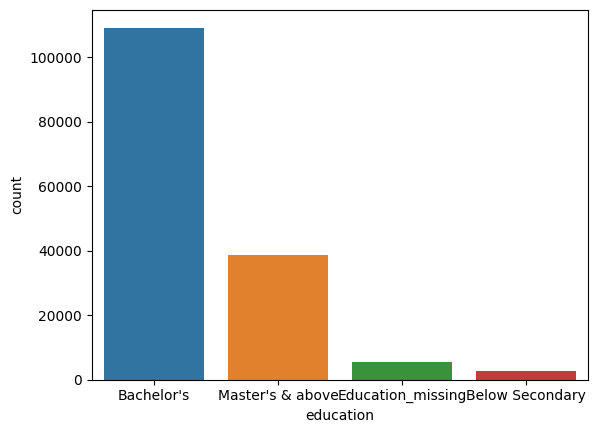

In [35]:
sns.countplot(x='education',data=x)

In [36]:
x.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

so we eliminated all null values

now we have to give label for all the string values using label encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

In [38]:
x['department'].value_counts()

Sales & Marketing    48189
Operations           31086
Technology           22511
Procurement          20091
Analytics            13361
Finance               7369
HR                    6514
Legal                 3463
R&D                   3262
Name: department, dtype: int64

In [39]:
x.department = label_encode.fit_transform(x.department)

In [40]:
x['department'].value_counts()

7    48189
4    31086
8    22511
5    20091
0    13361
1     7369
2     6514
3     3463
6     3262
Name: department, dtype: int64

7---->sales and marketing
4---->operations
8---->technology
5---->procurement
0----->analysis
1----->finance
2----->HR
3---->legal
6----->R&D

In [41]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,4,region_27,Bachelor's,m,sourcing,1,47,1.0,6,1,0,55,0
1,7,region_31,Bachelor's,m,other,1,38,3.0,9,0,0,54,0
2,8,region_27,Master's & above,m,sourcing,1,37,3.0,3,1,0,76,0
3,7,region_10,Bachelor's,m,sourcing,1,30,4.0,4,0,0,41,0
4,5,region_22,Bachelor's,m,sourcing,1,35,3.0,10,0,0,68,0


In [42]:
x['region'].value_counts()

region_2     35908
region_22    18643
region_7     12882
region_15     7652
region_13     7293
region_26     6048
region_31     5829
region_27     5236
region_4      5160
region_23     3899
region_16     3876
region_11     3788
region_28     3316
region_32     3093
region_29     2769
region_20     2526
region_5      2385
region_19     2295
region_17     2294
region_14     2229
region_30     2166
region_25     2148
region_6      1843
region_10     1764
region_8      1722
region_1      1640
region_12     1365
region_24     1342
region_9      1217
region_21     1198
region_3       895
region_34      721
region_33      650
region_18       54
Name: region, dtype: int64

In [43]:
x['education'].value_counts()

Bachelor's           109239
Master's & above      38647
Education_missing      5330
Below Secondary        2630
Name: education, dtype: int64

In [44]:
x.education = label_encode.fit_transform(x.education)

In [45]:
x['education'].value_counts()

0    109239
3     38647
2      5330
1      2630
Name: education, dtype: int64

0----->bachelors
3------>masters
2------->education
1------->below secondary

In [46]:
x['gender'].value_counts()

m    115351
f     40495
Name: gender, dtype: int64

In [47]:
x.gender = label_encode.fit_transform(x.gender)

In [48]:
x['gender'].value_counts()

1    115351
0     40495
Name: gender, dtype: int64

1------>m
0------>f

In [49]:
x['recruitment_channel'].value_counts()

other       90104
sourcing    62564
referred     3178
Name: recruitment_channel, dtype: int64

In [50]:
x.recruitment_channel = label_encode.fit_transform(x.recruitment_channel)

In [51]:
x['recruitment_channel'].value_counts()

0    90104
2    62564
1     3178
Name: recruitment_channel, dtype: int64

0---->other
2----->sourcing
1----->referred

In [52]:
for i in range (0,len(x['region'])):
    x['region'][i]=x['region'][i].replace('region_',"")
    x['region'][i]=int(x['region'][i])


/tmp/ipykernel_4958/1169475305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['region'][i]=x['region'][i].replace('region_',"")
/tmp/ipykernel_4958/1169475305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['region'][i]=int(x['region'][i])


In [53]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,4,27,0,1,2,1,47,1.0,6,1,0,55,0
1,7,31,0,1,0,1,38,3.0,9,0,0,54,0
2,8,27,3,1,2,1,37,3.0,3,1,0,76,0
3,7,10,0,1,2,1,30,4.0,4,0,0,41,0
4,5,22,0,1,2,1,35,3.0,10,0,0,68,0


<Axes: xlabel='department', ylabel='count'>

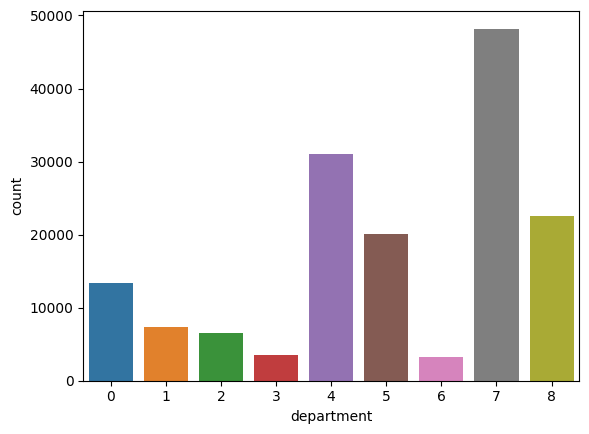

In [54]:
sns.countplot(x='department',data=x)

<Axes: xlabel='education', ylabel='count'>

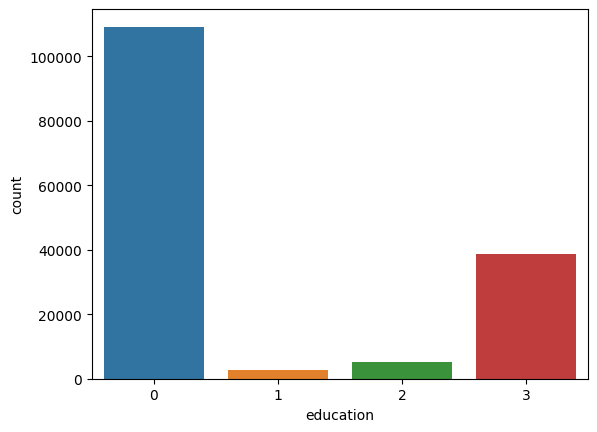

In [55]:
sns.countplot(x='education',data=x)

<Axes: xlabel='recruitment_channel', ylabel='count'>

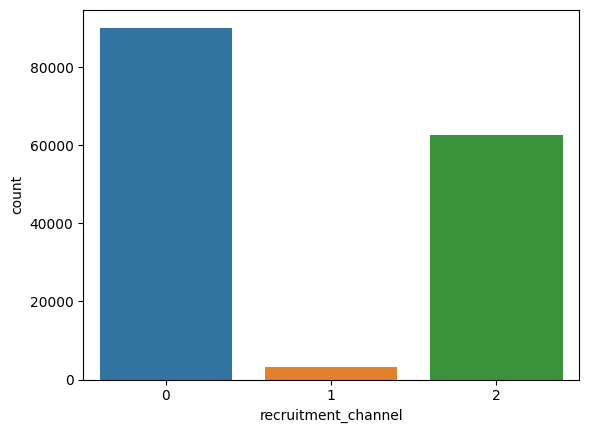

In [56]:
sns.countplot(x='recruitment_channel',data=x)

<Axes: xlabel='region', ylabel='count'>

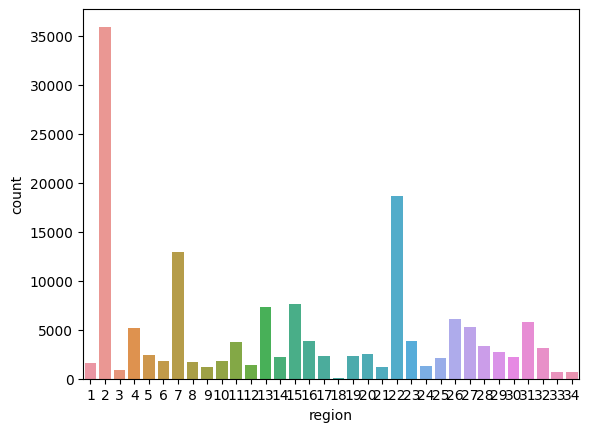

In [57]:
sns.countplot(x='region',data=x)

In [58]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,4,27,0,1,2,1,47,1.0,6,1,0,55,0
1,7,31,0,1,0,1,38,3.0,9,0,0,54,0
2,8,27,3,1,2,1,37,3.0,3,1,0,76,0
3,7,10,0,1,2,1,30,4.0,4,0,0,41,0
4,5,22,0,1,2,1,35,3.0,10,0,0,68,0


In [59]:
print(x)

        department region  education  gender  recruitment_channel  \
0                4     27          0       1                    2   
1                7     31          0       1                    0   
2                8     27          3       1                    2   
3                7     10          0       1                    2   
4                5     22          0       1                    2   
...            ...    ...        ...     ...                  ...   
155841           8     24          0       0                    2   
155842           8      5          0       1                    2   
155843           8      5          0       1                    0   
155844           4     30          0       0                    0   
155845           2     22          0       1                    0   

        no_of_trainings  age  previous_year_rating  length_of_service  \
0                     1   47                   1.0                  6   
1                     1  

scaling data

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,4,27,0,1,2,1,47,1.0,6,1,0,55,0
1,7,31,0,1,0,1,38,3.0,9,0,0,54,0
2,8,27,3,1,2,1,37,3.0,3,1,0,76,0
3,7,10,0,1,2,1,30,4.0,4,0,0,41,0
4,5,22,0,1,2,1,35,3.0,10,0,0,68,0


In [63]:
print(x)

        department region  education  gender  recruitment_channel  \
0                4     27          0       1                    2   
1                7     31          0       1                    0   
2                8     27          3       1                    2   
3                7     10          0       1                    2   
4                5     22          0       1                    2   
...            ...    ...        ...     ...                  ...   
155841           8     24          0       0                    2   
155842           8      5          0       1                    2   
155843           8      5          0       1                    0   
155844           4     30          0       0                    0   
155845           2     22          0       1                    0   

        no_of_trainings  age  previous_year_rating  length_of_service  \
0                     1   47                   1.0                  6   
1                     1  

In [64]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,4,27,0,1,2,1,47,1.0,6,1,0,55,0
1,7,31,0,1,0,1,38,3.0,9,0,0,54,0
2,8,27,3,1,2,1,37,3.0,3,1,0,76,0
3,7,10,0,1,2,1,30,4.0,4,0,0,41,0
4,5,22,0,1,2,1,35,3.0,10,0,0,68,0


In [65]:
x_train=scaler.fit_transform(x.drop('is_promoted',axis=1))

In [66]:
y_train=x['is_promoted']

In [67]:
print(x_train)

[[-0.43900775  1.25380808 -0.63637676 ...  1.2026193  -0.16054603
  -0.63852796]
 [ 0.77418503  1.64710668 -0.63637676 ... -0.83151834 -0.16054603
  -0.71269343]
 [ 1.17858262  1.25380808  1.66593705 ...  1.2026193  -0.16054603
   0.91894676]
 ...
 [ 1.17858262 -0.90933426 -0.63637676 ... -0.83151834 -0.16054603
   1.51227046]
 [-0.43900775  1.54878203 -0.63637676 ... -0.83151834 -0.16054603
  -0.26770065]
 [-1.24780294  0.76218482 -0.63637676 ...  1.2026193  -0.16054603
   1.06727769]]


In [68]:
print(y_train)

0         0
1         0
2         0
3         0
4         0
         ..
155841    0
155842    0
155843    0
155844    0
155845    0
Name: is_promoted, Length: 155846, dtype: int64


In [69]:
from sklearn.metrics import accuracy_score

In [70]:

from sklearn import tree

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [131]:
X_train.shape

(124676, 12)

In [134]:
X_test.shape

(31170, 12)

USING DECISION TREE

In [123]:
modeltree= tree.DecisionTreeClassifier()
modeltree = modeltree.fit(X_train, Y_train)

In [125]:
x_train_predict=modeltree.predict(X_train)
print(accuracy_score(x_train_predict,Y_train))

0.9992300041708108


In [126]:
print(roc_auc_score(Y_train,x_train_predict))

0.9973718685043685


test accuracy

In [127]:
x_test_predict=modeltree.predict(X_test)
print(accuracy_score(x_test_predict,Y_test))

0.7769008662175169


In [130]:
print(roc_auc_score(Y_test,x_test_predict))

0.5760516102763658


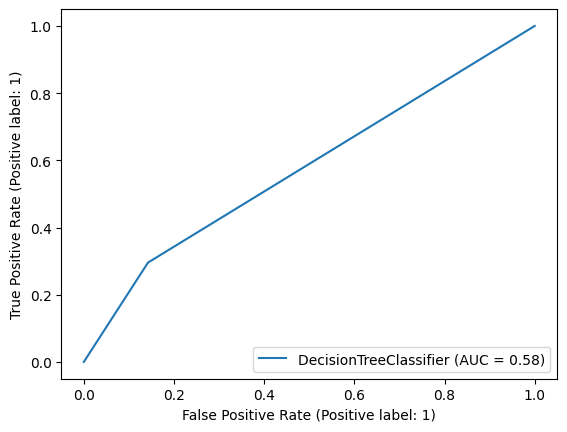

In [140]:
tree_disp = RocCurveDisplay.from_estimator(modeltree, X_test, Y_test)
plt.show()

In [74]:
from sklearn.metrics import RocCurveDisplay

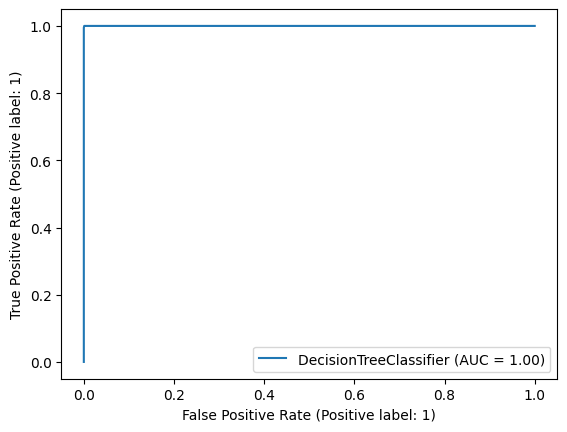

In [135]:
tree_disp = RocCurveDisplay.from_estimator(modeltree, X_train, Y_train)
plt.show()

In [76]:
from sklearn.metrics import confusion_matrix

In [136]:
cm=confusion_matrix(Y_train, x_train_predict)
print(cm)

[[106569      1]
 [    95  18011]]


In [78]:
from sklearn.metrics import ConfusionMatrixDisplay

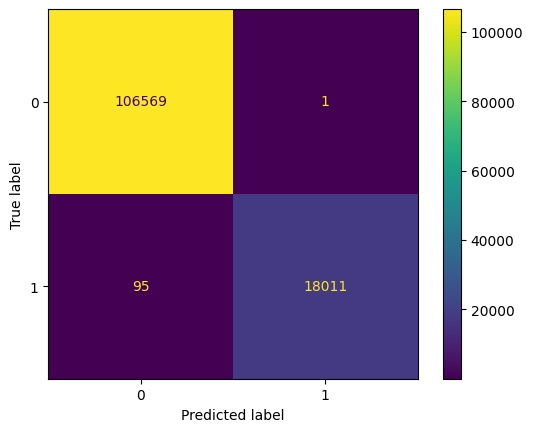

In [137]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

using random forest

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rmodel = RandomForestClassifier(max_depth=2, random_state=0)
rmodel.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [143]:
x_train_predict=modeltree.predict(X_train)
print(accuracy_score(x_train_predict,Y_train))

0.9992300041708108


In [144]:
print(roc_auc_score(Y_train,x_train_predict))

0.9973718685043685


testing accuracy

In [145]:
x_test_predict=modeltree.predict(X_test)
print(accuracy_score(x_test_predict,Y_test))

0.7769008662175169


In [146]:
print(roc_auc_score(Y_test,x_test_predict))

0.5760516102763658


[[22892  3764]
 [ 3190  1324]]


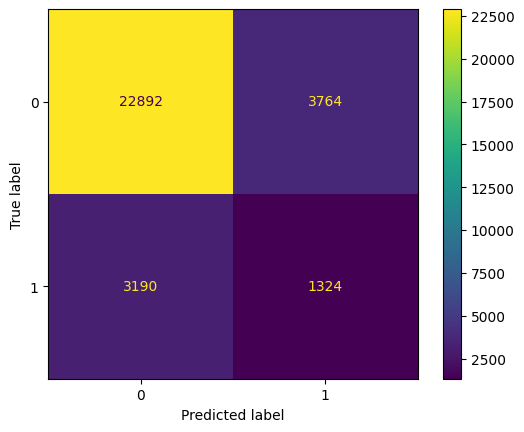

In [147]:
cm=confusion_matrix(Y_test, x_test_predict)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [80]:
t=pd.read_csv('/home/aravint/complete ml/test_data.csv')

In [81]:
t.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,140357,Sales & Marketing,region_31,Master's & above,m,other,2,46,4.0,2,1,0,43
1,131638,Analytics,region_28,Bachelor's,m,other,1,37,5.0,10,1,0,76
2,126519,Operations,region_11,NaN,m,other,1,40,5.0,9,1,0,58
3,61240,Procurement,region_30,Bachelor's,f,other,1,33,5.0,3,1,1,69
4,166530,Analytics,region_2,Bachelor's,m,other,2,30,4.0,3,1,0,86


In [82]:
t.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,38962.000000,38962.000000,38962.000000,35692.000000,38962.000000,38962.000000,38962.000000,38962.000000
mean,97184.740568,1.310302,34.586880,3.293539,5.850162,0.406473,0.025486,63.624686
std,56171.744917,0.545331,7.684095,1.203690,4.051867,0.491181,0.157599,13.410806
min,2.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,48580.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,52.000000
50%,97011.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,62.000000
75%,145754.500000,2.000000,39.000000,4.000000,8.000000,1.000000,0.000000,74.000000
max,194806.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [83]:
t.shape

(38962, 13)

In [84]:
t=t.drop(['employee_id'],axis=1)

In [118]:
t.shape

(38962, 12)

In [85]:
t.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_31,Master's & above,m,other,2,46,4.0,2,1,0,43
1,Analytics,region_28,Bachelor's,m,other,1,37,5.0,10,1,0,76
2,Operations,region_11,NaN,m,other,1,40,5.0,9,1,0,58
3,Procurement,region_30,Bachelor's,f,other,1,33,5.0,3,1,1,69
4,Analytics,region_2,Bachelor's,m,other,2,30,4.0,3,1,0,86


In [86]:
t.isnull().sum()

department                 0
region                     0
education               1326
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3270
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [87]:
t['previous_year_rating'] = t['previous_year_rating'].fillna(0)

In [88]:
t.isnull().sum()

department                 0
region                     0
education               1326
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [90]:
t['education'] = t['education'].fillna("Education_missing")

In [110]:
t.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [91]:
t.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_31,Master's & above,m,other,2,46,4.0,2,1,0,43
1,Analytics,region_28,Bachelor's,m,other,1,37,5.0,10,1,0,76
2,Operations,region_11,Education_missing,m,other,1,40,5.0,9,1,0,58
3,Procurement,region_30,Bachelor's,f,other,1,33,5.0,3,1,1,69
4,Analytics,region_2,Bachelor's,m,other,2,30,4.0,3,1,0,86


In [98]:
t.department = label_encode.fit_transform(t.department)

In [99]:
t['department'].value_counts()

7    11939
4     7755
8     5616
5     5119
0     3313
1     1896
2     1638
3      898
6      788
Name: department, dtype: int64

In [100]:
t.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,region_31,Master's & above,m,other,2,46,4.0,2,1,0,43
1,0,region_28,Bachelor's,m,other,1,37,5.0,10,1,0,76
2,4,region_11,Education_missing,m,other,1,40,5.0,9,1,0,58
3,5,region_30,Bachelor's,f,other,1,33,5.0,3,1,1,69
4,0,region_2,Bachelor's,m,other,2,30,4.0,3,1,0,86


In [102]:
t.education = label_encode.fit_transform(t.education)

In [103]:
t['education'].value_counts()

0    27491
3     9512
2     1326
1      633
Name: education, dtype: int64

In [104]:
t.gender = label_encode.fit_transform(t.gender)

In [105]:
t['gender'].value_counts()

1    28916
0    10046
Name: gender, dtype: int64

In [108]:
t.recruitment_channel = label_encode.fit_transform(t.recruitment_channel) 

In [109]:
t['recruitment_channel'].value_counts()

0    22509
2    15670
1      783
Name: recruitment_channel, dtype: int64

In [111]:
for i in range (0,len(t['region'])):
    t['region'][i]=t['region'][i].replace('region_',"")
    t['region'][i]=int(t['region'][i])

/tmp/ipykernel_4958/3304779961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['region'][i]=t['region'][i].replace('region_',"")
/tmp/ipykernel_4958/3304779961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['region'][i]=int(t['region'][i])


In [114]:
t.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,3,1,0,2,46,4.0,2,1,0,43
1,0,28,0,1,0,1,37,5.0,10,1,0,76
2,4,11,2,1,0,1,40,5.0,9,1,0,58
3,5,30,0,0,0,1,33,5.0,3,1,1,69
4,0,2,0,1,0,2,30,4.0,3,1,0,86


In [115]:
x_test=scaler.fit_transform(t)

In [116]:
x_test_predict=modeltree.predict(x_test)

In [117]:
print(x_test_predict)

[1 0 0 ... 0 0 0]


In [120]:
count=0
for i in range (0,len(x_test_predict)):
    if x_test_predict[i]==1:
        count+=1
print(count)        

6474


6474 of 38968 are promoted

to imporve accuracy and roc score we use deep learning model

In [148]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,4,27,0,1,2,1,47,1.0,6,1,0,55,0
1,7,31,0,1,0,1,38,3.0,9,0,0,54,0
2,8,27,3,1,2,1,37,3.0,3,1,0,76,0
3,7,10,0,1,2,1,30,4.0,4,0,0,41,0
4,5,22,0,1,2,1,35,3.0,10,0,0,68,0


In [149]:
t.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,3,1,0,2,46,4.0,2,1,0,43
1,0,28,0,1,0,1,37,5.0,10,1,0,76
2,4,11,2,1,0,1,40,5.0,9,1,0,58
3,5,30,0,0,0,1,33,5.0,3,1,1,69
4,0,2,0,1,0,2,30,4.0,3,1,0,86


In [150]:
x.to_csv('train_dl.csv', index=False)

In [151]:
t.to_csv('test_dl.csv', index=False)